In [1]:
import torch
import gpytorch
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PowerTransformer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

origin_features_df = pd.read_csv("../dataset/features.csv")

indices_round0 = np.array([18, 61, 115, 133, 242, 671, 889, 957, 1027, 1034, 1042, 1065,
                  1103, 1364, 1511, 1518, 1658, 2068, 2093, 2123, 2423, 2466, 
                  2477, 2678, 2750, 3078, 4121, 4272, 4800, 4808, 5323, 5421, 
                  5517, 5584, 5587, 5637, 5654, 5704, 5712, 5715, 5733, 5756, 
                  5884, 6133, 6222, 6334, 6383, 6415, 6479, 6608, 6648, 6884, 
                  7198, 7254, 7792, 8172, 8212, 8240, 8250, 8267, 8435, 8493, 
                  8631, 8664, 8691, 8987, 9023, 9267, 9538, 9556, 9696, 9708, 
                  9711, 9727, 9729, 9769, 9806, 9819, 9879, 10483, 10653, 
                  10710, 10736, 10742, 10760, 10887, 10889, 10897, 10960, 
                  11020, 11072, 11540, 11610, 11636, 11668, 11804, 11900, 
                  12018, 12055, 12094])
indices_round1_xi_001 = [9073, 9735, 4407, 11468, 4052, 9096, 3768, 2118, 9490, 9917, 9356, 10680, 3678, 9094, 2211, 4249, 6283, 10666, 4409,
                         4355, 6182, 4412, 9733, 3568, 3644, 4006, 4110, 6864, 5470, 5359, 9071, 4060, 6556, 10655, 10641, 2249, 4850, 9710, 
                         4118, 4045, 4315, 5475, 5370, 4878, 6865, 6769, 4410, 5345, 4406, 5324]
indices_round1_xi_05 = [9073, 9735, 4407, 11468, 9096, 3768, 9490, 9917, 9356, 10680, 3678, 9094, 4249, 10666, 4409, 
4355, 6182, 4412, 9733, 3568, 3644, 4006, 4110, 6864, 5470, 5359, 9071, 4060, 6556, 10655, 10641, 2249, 4850, 9710, 
4118, 4045, 4315, 5475, 5370, 4878, 6865, 6769, 4410, 5345, 4406, 5324, 11508, 11639, 10656, 9095]

indices_round2_xi_001 = [2098, 2110, 3878, 3884, 3905, 3980, 5210, 5266, 5325, 5846, 5999, 6047, 6120, 6271, 6305, 
             6696, 6725, 8139, 8143, 8280, 8327, 8328, 8329, 8537, 8546, 8569, 8670, 8818, 9450, 9878, 
             10224, 10245, 10261, 10283, 10358, 10384, 10398, 10441, 10465, 10656, 10819, 10840, 11392, 
             11438, 11508, 11666, 11831, 11832, 11854, 11855]

indices_round2_xi_05 =  [2098, 2106, 2110, 2114, 2501, 3186, 3502, 3603, 3720, 3878, 3884, 3905, 4293, 4338, 4720, 
             4746, 4811, 4937, 5024, 5210, 5325, 5407, 6525, 6602, 6811, 8057, 8280, 8281, 8327, 8328, 
             8329, 8500, 8537, 8546, 8569, 8592, 9491, 9512, 9513, 10261, 10358, 10384, 10411, 10441, 
             11830, 11831, 11832, 11853, 11854, 11855]

indices_round3_xi_001 = [1987, 2023, 2035, 2043, 2102, 2106, 2114, 2232, 2235, 2252, 2889, 3070, 3191, 3201, 3206, 
             3220, 3821, 4083, 4123, 6882, 8119, 8461, 8592, 8865, 8942, 9027, 9374, 9491, 9512, 9513, 
             9662, 9755, 9780, 9872, 9906, 9937, 10136, 10171, 10197, 10342, 10352, 10378, 10411, 10625, 
             10681, 10691, 10718, 12031, 12122, 12123]

indices_round3_xi_05 =  [2016, 2035, 2102, 2118, 2211, 2252, 2958, 3070, 3201, 3220, 3624, 3821, 3980, 4123, 4303, 
             5266, 5438, 5846, 6047, 6120, 6283, 6696, 6725, 6839, 8129, 8139, 8143, 8670, 8818, 8865, 
             8942, 9027, 9374, 9755, 9878, 9937, 10136, 10224, 10245, 10283, 10342, 10398, 10465, 10625, 
             10681, 10691, 10840, 12031, 12122, 12123]

sampled_indices = np.concatenate((indices_round0, indices_round1_xi_001, indices_round2_xi_001, indices_round3_xi_001))
#print(origin_features_df.iloc[indices_round1_xi_001])

z_vectors = np.load('A_Nnum_Sep/z_vectors.npy')
features = z_vectors[sampled_indices]
labels_df_RD01 = pd.read_csv('round1/Rint_xi001_0911.csv')  #round0 and 1
labels_RD01 = labels_df_RD01.iloc[:, 0].values
labels_df_RD2 = pd.read_csv('round2/Rint_xi001_0911.csv')  #round2 
labels_RD2 = labels_df_RD2.iloc[:, 0].values
labels_df_RD3 = pd.read_csv('round3/Rint_xi001_0911.csv')  #round3
labels_RD3 = labels_df_RD3.iloc[:, 0].values

labels = np.concatenate((labels_RD01, labels_RD2, labels_RD3))
print(labels.shape[0])
print(labels)
# features = features[:labels.shape[0], :]
 
# # Standardize the features and labels
# scaler_features = StandardScaler()
# features_scaled = scaler_features.fit_transform(features)
 
# scaler_labels = StandardScaler()
# labels_scaled = scaler_labels.fit_transform(labels.reshape(-1, 1)).flatten()
 
# # Apply PowerTransformer to features and labels
# scaler_features = PowerTransformer()
# features_scaled = scaler_features.fit_transform(features)
 
scaler_labels = PowerTransformer()
labels_scaled = scaler_labels.fit_transform(labels.reshape(-1, 1)).flatten()
 
features_scaled = features
# labels_scaled = labels.reshape(-1, 1).flatten()
 
 
# Split data into training and validation sets
train_x, test_x, train_y, test_y = train_test_split(features_scaled, labels_scaled, test_size=0.1, random_state=40)
 
# Convert to tensors

train_x_tensor = torch.tensor(train_x, dtype=torch.float32).cuda()
train_y_tensor = torch.tensor(train_y, dtype=torch.float32).cuda()
test_x_tensor = torch.tensor(test_x, dtype=torch.float32).cuda()
test_y_tensor = torch.tensor(test_y, dtype=torch.float32).cuda()
# test_x_tensor = torch.tensor(train_x, dtype=torch.float32).cuda()
# test_y_tensor = torch.tensor(train_y, dtype=torch.float32).cuda()
 
class GPRegressionModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GPRegressionModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(
           #gpytorch.kernels.RBFKernel() + gpytorch.kernels.MaternKernel(nu=1.5) #################original
           gpytorch.kernels.LinearKernel()+ gpytorch.kernels.RBFKernel()
        )
        
 
    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)
 
# Initialize likelihood and model
likelihood = gpytorch.likelihoods.GaussianLikelihood().cuda()
# likelihood = gpytorch.likelihoods.GaussianLikelihood(noise_constraint=gpytorch.constraints.GreaterThan(1e-4)).cuda() #################
model = GPRegressionModel(train_x_tensor, train_y_tensor, likelihood).cuda()
 
# Set the model and likelihood to training mode
model.train()
likelihood.train()
 
# Use the Adam optimizer
optimizer = torch.optim.Adam([
    {'params': model.parameters()},  # Includes GaussianLikelihood parameters
], lr=0.01)
 
# "Loss" for GPs - the marginal log likelihood
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)
 
training_iterations = 20000
early_stopping_patience = 2000
best_loss = float('inf')
early_stopping_counter = 0
 
for i in range(training_iterations):
    optimizer.zero_grad()
    output = model(train_x_tensor)
    loss = -mll(output, train_y_tensor)
    loss.backward()
    optimizer.step()
   
    if (i+1) % 500 == 0:
        print(f'Iteration {i+1}/{training_iterations} - Loss: {loss.item():.4f}')
   
    if loss.item() < best_loss:
        best_loss = loss.item()
        early_stopping_counter = 0
    else:
        early_stopping_counter += 1
 
    if early_stopping_counter > early_stopping_patience:
        print(f"Early stopping at iteration {i+1}")
        break
 
# Set the model and likelihood to evaluation mode
model.eval()
likelihood.eval()
 
# Make predictions on training data
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    train_predictions = likelihood(model(train_x_tensor))
    train_mean = train_predictions.mean
    train_lower, train_upper = train_predictions.confidence_region()
 
# Make predictions on validation data
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    test_predictions = likelihood(model(test_x_tensor))
    test_mean = test_predictions.mean
    test_lower, test_upper = test_predictions.confidence_region()
 
# Save the model and likelihood
model_save_path = "saved_model/gpr_model_round3_xi001.pth"  # Update the path accordingly
torch.save({
    'model_state_dict': model.state_dict(),
    'likelihood_state_dict': likelihood.state_dict()
}, model_save_path)
print(f"Model saved to {model_save_path}")
 
# Select the first feature for plotting
train_x_plot = train_x_tensor[:, 0]
test_x_plot = test_x_tensor[:, 0]
 
# Sort the training data and predictions by the first feature for a cleaner plot
sorted_train_indices = torch.argsort(train_x_plot)
sorted_train_x_tensor = train_x_plot[sorted_train_indices]
sorted_train_y_tensor = train_y_tensor[sorted_train_indices]
sorted_train_mean = train_mean[sorted_train_indices]
sorted_train_lower = train_lower[sorted_train_indices]
sorted_train_upper = train_upper[sorted_train_indices]
 
# Sort the validation data and predictions similarly
sorted_test_indices = torch.argsort(test_x_plot)
sorted_test_x_tensor = test_x_plot[sorted_test_indices]
sorted_test_y_tensor = test_y_tensor[sorted_test_indices]
sorted_test_mean = test_mean[sorted_test_indices]
sorted_test_lower = test_lower[sorted_test_indices]
sorted_test_upper = test_upper[sorted_test_indices]
 
# Plot results
#plt.figure(figsize=(14, 7))
 
# Training data
# plt.plot(sorted_train_x_tensor.cpu().numpy(), sorted_train_y_tensor.cpu().numpy(), 'k*', label='Actual Training Data')
# plt.plot(sorted_train_x_tensor.cpu().numpy(), sorted_train_mean.cpu().numpy(), 'b', label='Predicted Training Mean')
# plt.fill_between(sorted_train_x_tensor.cpu().numpy(),
#                  sorted_train_lower.cpu().numpy(),
#                  sorted_train_upper.cpu().numpy(),
#                  color='blue', alpha=0.3, label='Training Confidence Interval')
 
# Validation data
#plt.plot(sorted_test_x_tensor.cpu().numpy(), sorted_test_y_tensor.cpu().numpy(), 'r*', label='Actual Validation Data')
#plt.plot(sorted_test_x_tensor.cpu().numpy(), sorted_test_mean.cpu().numpy(), 'g', label='Predicted Validation Mean')
#plt.fill_between(sorted_test_x_tensor.cpu().numpy(),
#                 sorted_test_lower.cpu().numpy(),
#                 sorted_test_upper.cpu().numpy(),
#                 color='green', alpha=0.3, label='Validation Confidence Interval')
 
#plt.legend()
#plt.title("Gaussian Process Regression: Prediction vs Actual Data")
#plt.xlabel("Feature (First Feature)")
#plt.ylabel("Target")
#plt.show()
 
# Calculate RMSE and R^2 for validation set
rmse = mean_squared_error(test_y_tensor.cpu(), test_mean.cpu(), squared=False)
r2 = r2_score(test_y_tensor.cpu(), test_mean.cpu())
 
print(f'Validation RMSE: {rmse}')
print(f'Validation R²: {r2}')

250
[-8.1642976e-01 -9.4948932e-01 -9.8496491e-01 -6.5889436e-01
 -9.3645321e-01 -1.0167322e+00 -7.4377859e-01 -9.9644788e-01
 -9.9881326e-01 -7.5037776e-01 -1.0021756e+00 -9.0686463e-01
 -1.0667072e+00 -1.2295076e+00 -6.5197421e-01 -9.0631905e-01
 -9.1259885e-01 -2.4345382e-01  1.3497526e+01  1.5606751e+02
 -7.1318990e-01  6.1716003e+01  2.7893554e+01  1.1564561e+00
  1.1162108e+01 -9.0339681e-02 -7.6390268e-02 -5.3017474e-01
  3.2693094e+00  2.0848189e+01  1.6195502e+01  1.9593589e+00
  4.7798914e+00 -8.8636412e-01 -8.5309210e-01 -1.3033748e-01
 -5.8607133e-01  6.5114180e+01  2.4665839e+01  5.8477838e+00
  2.1732567e+00  1.8036494e+02  1.3303147e-01  4.0728500e-01
  2.8474537e+01  2.3157743e-01 -9.3223917e-01 -8.5520525e-01
  5.0865880e+00  1.4848778e+02  1.0050874e+01  1.0251983e+02
 -4.3976868e-01  5.6243220e-04 -2.8200912e-01  1.1906437e+00
 -4.7925496e-01  1.1886190e+00  2.9737633e+00 -8.4565824e-02
  1.1038596e-01 -9.9212045e-01  6.0955444e-01 -1.2394536e+00
  7.5854943e-01  1.2

/home/xin/anaconda3/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/home/xin/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [2]:
from scipy.stats import norm

# unsampled data points
all_indices = np.arange(z_vectors.shape[0])
unsampled_indices = np.setdiff1d(all_indices, sampled_indices)
unsampled_z_vectors = z_vectors[unsampled_indices]
#np.save("round0/round0_unsampled_Zvectors.npy", np.array(unsampled_z_vectors))
unsampled_z_vectors_tensor = torch.tensor(unsampled_z_vectors, dtype=torch.float32).cuda()
print(unsampled_z_vectors_tensor.shape)

#y_best is the highest Rint in round 0
#true value or best prediction in GPR? different tutorials use different values
#question: y is scaled in each loop and it will change each time; but in each loop, we target the highest y after scaling
y_best = np.max(labels_scaled) 


# Make predictions on the unsampled dataset
with torch.no_grad(), gpytorch.settings.fast_pred_var():
    unsampled_predictions = likelihood(model(unsampled_z_vectors_tensor))
    unsampled_mean = unsampled_predictions.mean.cpu().numpy()  
    unsampled_std = unsampled_predictions.stddev.cpu().numpy() 

xi = 0.01  # 0.01 or 0.5

# Calculate the expected improvement for each unsampled x
Z = (unsampled_mean - y_best - xi) / unsampled_std
#EI = (unsampled_mean - y_best - xi) * norm.cdf(Z) + unsampled_std * norm.pdf(Z)
EI = np.where(
    unsampled_std > 0,  
    (unsampled_mean - y_best - xi) * norm.cdf(Z) + unsampled_std * norm.pdf(Z),
    0  
)
print(EI.shape)

# sort and select next 50 candidates
top_n_indices = np.argsort(EI)[-50:]
top_n_indices = np.sort(top_n_indices)  #sort the indices
top_n_unsampled_vectors = unsampled_z_vectors[top_n_indices]

top_n_indices_in_z_vectors = np.array([np.where(np.all(z_vectors == vec, axis=1))[0][0] for vec in top_n_unsampled_vectors])

if np.array_equal(top_n_unsampled_vectors, z_vectors[top_n_indices_in_z_vectors]):
    print("done!")
else:
    print("Something went wrong!")

origin_features_df = pd.read_csv("../dataset/features.csv")
roundi_df = origin_features_df.iloc[top_n_indices_in_z_vectors]
#roundi_df.to_csv("round2/features_round1_xi001.csv", index=False)

indices_sampled = np.concatenate((sampled_indices, top_n_indices_in_z_vectors))
print('indices sampled so far:\n', indices_sampled)

torch.Size([11874, 16])
(11874,)
done!
indices sampled so far:
 [   18    61   115   133   242   671   889   957  1027  1034  1042  1065
  1103  1364  1511  1518  1658  2068  2093  2123  2423  2466  2477  2678
  2750  3078  4121  4272  4800  4808  5323  5421  5517  5584  5587  5637
  5654  5704  5712  5715  5733  5756  5884  6133  6222  6334  6383  6415
  6479  6608  6648  6884  7198  7254  7792  8172  8212  8240  8250  8267
  8435  8493  8631  8664  8691  8987  9023  9267  9538  9556  9696  9708
  9711  9727  9729  9769  9806  9819  9879 10483 10653 10710 10736 10742
 10760 10887 10889 10897 10960 11020 11072 11540 11610 11636 11668 11804
 11900 12018 12055 12094  9073  9735  4407 11468  4052  9096  3768  2118
  9490  9917  9356 10680  3678  9094  2211  4249  6283 10666  4409  4355
  6182  4412  9733  3568  3644  4006  4110  6864  5470  5359  9071  4060
  6556 10655 10641  2249  4850  9710  4118  4045  4315  5475  5370  4878
  6865  6769  4410  5345  4406  5324  2098  2110  3878  3884

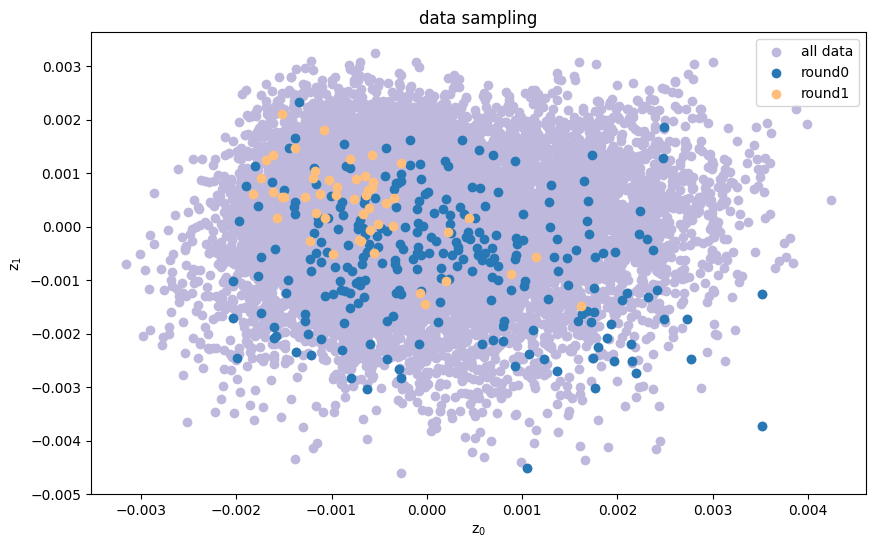

In [20]:
import matplotlib.pyplot as plt

round0 = z_vectors[sampled_indices]
round1 = z_vectors[top_n_indices_in_z_vectors]

plt.figure(figsize=(10, 6))
plt.scatter(z_vectors[:, 0], z_vectors[:, 1], color='#BEB8DC', label='all data')
plt.scatter(round0[:, 0], round0[:, 1], color='#2878B5', label='round0')
plt.scatter(round1[:, 0], round1[:, 1], color='#FFBE7A', label='round1')

plt.title('data sampling')
plt.xlabel('z$_{0}$')
plt.ylabel('z$_{1}$')
plt.legend()

plt.show()

[]
